# 12d - AgriPV: Designing for adecuate crop shading 

This journal supports the process of designing a solar panel configuration to appropriately represent ideal shading conditions for coffee production underneath elevated solar panels. 

The coffee trees would be under and/or in between elevated solar panels (panels would be elevated 6, 8, or 10 ft tall). The light/shade analysis helps determine appropriate panel heights and spacings t0 achieve appropriate shading.  The desired level of shading is maximum of 30% (i.e., 70% of normal, unshaded light). 

Details:
1.  The coffee plants are expected to be \~5 ft tall. (5-6 ft tall and 3 ft wide (<a href="https://realgoodcoffeeco.com/blogs/realgoodblog/how-to-grow-a-coffee-plant-at-home#:~:text=However%2C%20you%20must%20keep%20in,tall%20and%203%20feet%20wide">Reference</a>)
2.	Location: 18.202142, -66.759187; (18°12'07.7"N 66°45'33.1"W)
3.	Desired area of initial analysis: 400-600 ft2 (37-55 m2)
4.	Racking: Fixed-tilt panels
5.	Panel size: 3.3 feet x 5.4 feet                                    (1m x 1.64m)
6.	Analysis variations
<ul> <li> a.	Panel height: would like to examine heights of 6 ft, 8 ft, and 10 ft hub height. 
<li> b.	Panel spacing (N/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft) </li> 
<li> c.	Inter-Row spacing (E/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft)! </li> 


Steps on this Journal:
<ol>
    <li> <a href='#step1'> Loop to sample irradiance at where Three would be located </li>
    <li> <a href='#step2'> Model Empty Field to Have a Comparison Value </li>
    <li> <a href='#step3'> Loop to sample irradiance at the Trees, by including the Trees Geometry </li>
     <ul><li> <a href='#step3b'>Single simulation until MakeOct for Getting a PRETTY IMAGE </li></ul>
    <li> <a href='#step4'> Compile Results</li>
</ol>
        

        
![AgriPV Coffee Trees Simulation](../images_wiki/AdvancedJournals/AgriPV_CoffeeTrees.PNG)

        

In [1]:
import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd

In [3]:
testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'AgriPVCropShading')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
print(testfolder)

C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico


### General Parameters and Variables

In [2]:
lat = 18.202142
lon = -66.759187

albedo = 0.25 # Grass value from Torres Molina, "Measuring UHI in Puerto Rico" 18th LACCEI 
              # International Multi-Conference for Engineering, Education, and Technology

ft2m = 0.3048

# Loops
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [round(lat), 10]

x = 1.64
y = 1        
azimuth = 180
nMods = 20
nRows = 7
numpanels = 1
moduletype = 'PR'
hpc = False
sim_general_name = 'Coffee'

In [4]:
if not os.path.exists(os.path.join(testfolder, 'EPWs')):
    demo = bifacial_radiance.RadianceObj('test',testfolder)  
    epwfile = demo.getEPW(lat,lon)    
else:
    epwfile = r'EPWs\PRI_Mercedita.AP.785203_TMY3.epw'

<a id='step1'></a>

# 1. Loop to sample irradiance at where Three would be located

In [6]:
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder))  
demo.setGround(albedo)
demo.readWeatherFile(epwfile)
demo.genCumSky()

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
Loading albedo, 1 value(s), 0.250 avg
1 nonzero albedo values.
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -13 < -6 degrees and Idh = 11 > 10 W/m^2 on day 52 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 16 > 10 W/m^2 on day 58 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 14 > 10 W/m^2 on day 59 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 11 > 10 W/m^2 on day 59 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 14 > 10 W/m^2 on day 61 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 16 > 10 W/

'skies\\cumulative.rad'

In [ ]:
for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1)))

                # Coffe plant location at:
                coffeeplant_x = (x+xgap)/2
                coffeeplant_y = pitch/2

                demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
                sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
                scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)
                octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
                analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)

                # Modify sensor position to coffee plant location
                frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)
                groundscan = frontscan.copy() 
                groundscan['xstart'] = coffeeplant_x
                groundscan['ystart'] = coffeeplant_y
                groundscan['zstart'] = 0.05
                groundscan['orient'] = '0 0 -1'
                analysis.analysis(octfile, name=sim_name+'_Front&Back', frontscan=frontscan, backscan=backscan)
                analysis.analysis(octfile, name=sim_name+'_Ground&Back', frontscan=groundscan, backscan=backscan)

                


Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been

Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Ground&Back.cs

Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_Front&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_Front&Back.csv


Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Front&Back.csv
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Ground&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Ground&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_18_pitch_1.6_Front&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_18_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_1.2_tilt_18_pitch_1.6_Front&Back.csv


<a id='step2'></a>

# 2. Model Empty Field to Have a Comparison Value

In [ ]:
sim_name = 'EMPTY'
demo.makeModule(name=moduletype, x=0.001, y=0.001, xgap = 0)
sceneDict = {'tilt':0,'pitch':2,'clearance_height':0.005,'azimuth':180, 'nMods': 1, 'nRows': 1} 
scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)
octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)
emptyscan = frontscan.copy() 
emptyscan['xstart'] = 3
emptyscan['ystart'] = 3
emptyscan['zstart'] = 0.05
emptyscan['orient'] = '0 0 -1'
emptybackscan = emptyscan.copy()
emptybackscan['orient'] = '0 0 1'
analysis.analysis(octfile, name='_EMPTYSCAN', frontscan=emptyscan, backscan=emptybackscan)


In [ ]:
resname = os.path.join(testfolder, 'results')
resname = os.path.join(resname, 'irr__EMPTYSCAN.csv')
data = pd.read_csv(resname)
print("YEARLY TOTAL Wh/m2:", data['Wm2Front'])

<a id='step3'></a>

# 3. Loop to sample irradiance at the Trees, by including the Trees Geometry


In [ ]:
tree_albedo = 0.165 # Wikipedia [0.15-0.18]
trunk_x = 0.8 * ft2m
trunk_y = trunk_x
trunk_z = 1 * ft2m

tree_x = 3 * ft2m
tree_y = tree_x
tree_z = 4 * ft2m

In [ ]:
for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1)))

                coffeeplant_x = (x+xgap)/2
                coffeeplant_y = pitch

                demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
                sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
                scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)

                # Appending the Trees here
                text = ''
                for ii in range(0,3):
                    coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii
                    for jj in range(0,3):
                        coffeeplant_y = pitch/2 + pitch*jj
                        name = 'tree'+str(ii)+str(jj)
                        text += '\r\n! genrev Metal_Grey tube{}tree t*{} {} 32 | xform -t {} {} {}'.format('head'+str(ii)+str(jj),tree_z, tree_x/2.0, 
                                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                                           -trunk_x/2.0 + coffeeplant_y, trunk_z)
                        text += '\r\n! genrev Metal_Grey tube{}tree t*{} {} 32 | xform -t {} {} 0'.format('trunk'+str(ii)+str(jj),trunk_z, trunk_x/2.0, 
                                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                                          -trunk_x/2.0 + coffeeplant_y)
              
                        customObject = demo.makeCustomObject(name,text)
                        demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

                octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
                analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)


                ii = 1
                jj = 1
                coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii 
                coffeeplant_y = pitch/2 + pitch*jj
                frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)

                treescan_south = frontscan.copy()
                treescan_north = frontscan.copy()
                treescan_east = frontscan.copy()
                treescan_west = frontscan.copy()
                
                treescan_south['xstart'] = coffeeplant_x
                treescan_south['ystart'] = coffeeplant_y  - tree_x/2.0 - 0.05
                treescan_south['zstart'] = tree_z
                treescan_south['orient'] = '0 1 0'

                treescan_north['xstart'] = coffeeplant_x
                treescan_north['ystart'] = coffeeplant_y  + tree_x/2.0 + 0.05
                treescan_north['zstart'] = tree_z
                treescan_north['orient'] = '0 -1 0'

                treescan_east['xstart'] = coffeeplant_x + tree_x/2.0 + 0.05
                treescan_east['ystart'] = coffeeplant_y 
                treescan_east['zstart'] = tree_z
                treescan_east['orient'] = '-1 0 0'

                treescan_west['xstart'] = coffeeplant_x - tree_x/2.0 - 0.05
                treescan_west['ystart'] = coffeeplant_y 
                treescan_west['zstart'] = tree_z
                treescan_west['orient'] = '1 0 0'
    
                groundscan = frontscan.copy() 
                groundscan['xstart'] = coffeeplant_x
                groundscan['ystart'] = coffeeplant_y
                groundscan['zstart'] = 0.05
                groundscan['orient'] = '0 0 -1'
                analysis.analysis(octfile, name=sim_name+'_North&South', frontscan=treescan_north, backscan=treescan_south)
                analysis.analysis(octfile, name=sim_name+'_East&West', frontscan=treescan_east, backscan=treescan_west)

<a id='step3b'></a>

### Single simulation until MakeOct for Getting a PRETTY IMAGE 

In [ ]:
tree_albedo = 0.165 # Wikipedia [0.15-0.18]
trunk_x = 0.8 * ft2m
trunk_y = trunk_x
trunk_z = 1 * ft2m

tree_x = 3 * ft2m
tree_y = tree_x
tree_z = 4 * ft2m


clearance_height = clearance_heights[0]
xgap = xgaps[-1]
tilt = tilts[0]
pitch = y * np.cos(np.radians(tilt))+Ds[-1]

sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                '_xgap_'+str(round(xgap,1))+\
                '_tilt_'+str(round(tilt,1))+
                '_pitch_'+str(round(pitch,1)))


demo = bifacial_radiance.RadianceObj(sim_name,str(testfolder))  
demo.setGround(albedo)
demo.readWeatherFile(epwfile)

coffeeplant_x = (x+xgap)/2
coffeeplant_y = pitch

demo.gendaylit(4020)
demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)


for ii in range(0,3):
    coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii
    for jj in range(0,3):
        coffeeplant_y = pitch/2 + pitch*jj
        name = 'tree'+str(ii)+str(jj)
        text = '! genrev litesoil tube{}tree t*{} {} 32 | xform -t {} {} {}'.format('head'+str(ii)+str(jj),tree_z, tree_x/2.0, 
                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                           -trunk_x/2.0 + coffeeplant_y, trunk_z)
        text += '\r\n! genrev litesoil tube{}tree t*{} {} 32 | xform -t {} {} 0'.format('trunk'+str(ii)+str(jj),trunk_z, trunk_x/2.0, 
                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                          -trunk_x/2.0 + coffeeplant_y)

        customObject = demo.makeCustomObject(name,text)
        demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  


#### Now you can view the Geometry by navigating on the terminal to the testfolder, and using the octfile name generated above

>rvu -vf views\front.vp -e .0265652 -vp 2 -21 2.5 -vd 0 1 0 Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2.oct

<a id='step4'></a>

## 4. Compile Results

In [ ]:
# PUERTO RICO
epwfile2 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\EPWs\PRI_Mercedita.AP.785203_TMY3.epw'
rad_obj = bifacial_radiance.RadianceObj()
metdata = rad_obj.readWeatherFile(epwfile2)

puerto_Rico = [179206, 188133, 193847, 191882, 162560]  # by Month May t- Sept Wh/m2
puerto_Rico_YEAR = metdata.ghi.sum()  # Wh/m2
puerto_Rico_YEAR

In [ ]:
testfolder = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\results'
lat = lat = 18.202142
ft2m = 0.3048
y = 1

# Loops
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [round(lat), 10]


In [ ]:
# irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv

ch_all = []
xgap_all = []
tilt_all = []
pitch_all = []
FrontIrrad = []
RearIrrad = []
GroundIrrad = []

for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]


                sim_name = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Front&Back.csv')

                sim_name2 = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Ground&Back.csv')

                ch_all.append(clearance_height)
                xgap_all.append(xgap)
                tilt_all.append(tilt)
                pitch_all.append(pitch)
                data = pd.read_csv(os.path.join(testfolder, sim_name))
                FrontIrrad.append(data['Wm2Front'].item())
                RearIrrad.append(data['Wm2Back'].item())
                data = pd.read_csv(os.path.join(testfolder, sim_name2))
                GroundIrrad.append(data['Wm2Front'].item())


In [ ]:
ch_all = pd.Series(ch_all, name='clearance_height')
xgap_all = pd.Series(xgap_all, name='xgap')
tilt_all = pd.Series(tilt_all, name='tilt')
pitch_all = pd.Series(pitch_all, name='pitch')
FrontIrrad = pd.Series(FrontIrrad, name='FrontIrrad')
RearIrrad = pd.Series(RearIrrad, name='RearIrrad')
GroundIrrad = pd.Series(GroundIrrad, name='GroundIrrad')



In [ ]:
df = pd.concat([ch_all, xgap_all, tilt_all, pitch_all, FrontIrrad, RearIrrad, GroundIrrad], axis=1)
df.head()

In [ ]:
df[['GroundIrrad_percent_GHI']] = df[['GroundIrrad']]*100/puerto_Rico_YEAR
df['FrontIrrad_percent_GHI'] = df['FrontIrrad']*100/puerto_Rico_YEAR
df['RearIrrad_percent_GHI'] = df['RearIrrad']*100/puerto_Rico_YEAR
df['BifacialGain'] = df['RearIrrad']*0.65*100/df['FrontIrrad']

In [ ]:
print(df['GroundIrrad_percent_GHI'].min())
print(df['GroundIrrad_percent_GHI'].max())

In [ ]:
#tilt[18, 10]
#clearance_heights = [6,8,10]

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

df2=df.loc[df['tilt']==tilts[1]]
df3 = df2.loc[df2['clearance_height']==clearance_heights[2]]
df3['pitch']=df3['pitch'].round(1)
df3['xgap']=df3['xgap'].round(1)

sns.set(font_scale=2) 
table = df3.pivot('pitch', 'xgap', 'GroundIrrad_percent_GHI')
ax = sns.heatmap(table, cmap='hot', vmin = 50, vmax= 100, annot=True)
ax.invert_yaxis()
print(table)
plt.show()

# TAILS PLOTTING RESULT

In [ ]:
trees = pd.read_csv(r'C:\Users\sayala\Documents\Agrivoltaics\TREES.csv')
trees.tail()

In [ ]:
trees['TreeIrrad_percent_GHI'] = trees[['NorthIrrad','SouthIrrad','EastIrrad','WestIrrad']].mean(axis=1)*100/puerto_Rico_YEAR


In [ ]:
print(trees['TreeIrrad_percent_GHI'].min())
print(trees['TreeIrrad_percent_GHI'].max())


In [ ]:
trees

In [ ]:
clearance_heightss = [1.8288, 2.4384, 3.0480]

In [ ]:
df2=trees.loc[trees['tilt']==tilts[0]]
df3

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

df2=trees.loc[trees['tilt']==tilts[1]]
df3 = df2.loc[df2['clearance_height']==clearance_heightss[0]]
df3['pitch']=df3['pitch'].round(1)
df3['xgap']=df3['xgap'].round(1)

sns.set(font_scale=2) 
table = df3.pivot('pitch', 'xgap', 'TreeIrrad_percent_GHI')
ax = sns.heatmap(table, cmap='hot', vmin = 0, vmax= 100, annot=True)
ax.invert_yaxis()
print(table)
plt.show()

# CHEcK

## COMPILE PUERTO RICO RESULTS

In [69]:
# PUERTO RICO
epwfile2 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\EPWs\PRI_Mercedita.AP.785203_TMY3.epw'
metdata = rad_obj.readWeatherFile(epwfile2)

ghi_PR=[]
for ii in range(0, len(starts)):
    start = starts[ii]
    end = ends[ii]
    ghi_PR.append(metdata.ghi[start:end].sum())
ghi_PR    

puerto_Rico = [179206, 188133, 193847, 191882, 162560]  # Wh/m2
puerto_Rico_YEAR = metdata.ghi.sum()  # Wh/m2

start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [51]:
testfolder = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\results'
lat = lat = 18.202142
ft2m = 0.3048
y = 1

# Loops
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [round(lat), 10]


In [62]:
# irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv

ch_all = []
xgap_all = []
tilt_all = []
pitch_all = []
FrontIrrad = []
RearIrrad = []
GroundIrrad = []

for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]


                sim_name = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Front&Back.csv')

                sim_name2 = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Ground&Back.csv')

                ch_all.append(clearance_height)
                xgap_all.append(xgap)
                tilt_all.append(tilt)
                pitch_all.append(pitch)
                data = pd.read_csv(os.path.join(testfolder, sim_name))
                FrontIrrad.append(data['Wm2Front'].item())
                RearIrrad.append(data['Wm2Back'].item())
                data = pd.read_csv(os.path.join(testfolder, sim_name2))
                GroundIrrad.append(data['Wm2Front'].item())


In [64]:
ch_all = pd.Series(ch_all, name='clearance_height')
xgap_all = pd.Series(xgap_all, name='xgap')
tilt_all = pd.Series(tilt_all, name='tilt')
pitch_all = pd.Series(pitch_all, name='pitch')
FrontIrrad = pd.Series(FrontIrrad, name='FrontIrrad')
RearIrrad = pd.Series(RearIrrad, name='RearIrrad')
GroundIrrad = pd.Series(GroundIrrad, name='GroundIrrad')



In [77]:
df = pd.concat([ch_all, xgap_all, tilt_all, pitch_all, FrontIrrad, RearIrrad, GroundIrrad], axis=1)
df.head()

,clearance_height,xgap,tilt,pitch,FrontIrrad,RearIrrad,GroundIrrad
0,1.8288,0.6096,18,1.560657,2000070.0,267628.8,1118029.0
1,1.8288,0.6096,18,1.865457,2009647.0,300637.0,1281753.0
2,1.8288,0.6096,18,2.170257,2012604.0,325479.9,1368239.0
3,1.8288,0.6096,10,1.594408,1998602.0,274611.8,1133789.0
4,1.8288,0.6096,10,1.899208,2002028.0,305427.4,1342856.0


In [82]:
df[['GroundIrrad_percent_GHI']] = df[['GroundIrrad']]*100/puerto_Rico_YEAR
df['FrontIrrad_percent_GHI'] = df['FrontIrrad']*100/puerto_Rico_YEAR
df['RearIrrad_percent_GHI'] = df['RearIrrad']*100/puerto_Rico_YEAR
df['BifacialGain'] = df['RearIrrad']*0.65*100/df['FrontIrrad']

In [124]:
print(df['GroundIrrad_percent_GHI'].min())
print(df['GroundIrrad_percent_GHI'].max())

55.8368342621305
78.38497688728512


In [140]:
#tilt[18, 10]
#clearance_heights = [6,8,10]

TypeError: 'int' object is not subscriptable

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


xgap         0.6        0.9        1.2
pitch                                 
1.6    56.996927  61.772542  66.208633
1.9    63.293483  66.704369  71.058353
2.2    69.024555  72.255017  75.495508


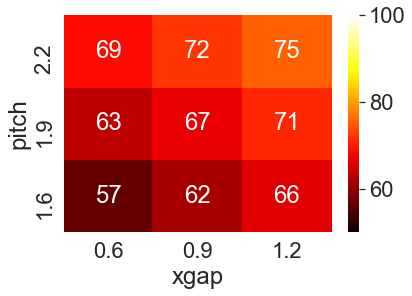

In [151]:
import seaborn as sns 
import matplotlib.pyplot as plt

df2=df.loc[df['tilt']==tilts[1]]
df3 = df2.loc[df2['clearance_height']==clearance_heights[2]]
df3['pitch']=df3['pitch'].round(1)
df3['xgap']=df3['xgap'].round(1)

sns.set(font_scale=2) 
table = df3.pivot('pitch', 'xgap', 'GroundIrrad_percent_GHI')
ax = sns.heatmap(table, cmap='hot', vmin = 50, vmax= 100, annot=True)
ax.invert_yaxis()
print(table)
plt.show()